<h1>Model Development: Naive Bayes</h1>

Source: https://gist.github.com/xiaofan-lei/397724d9f997dd9e68963f99dd2025ae#file-3-naivebayes-sentimentanalysis-py

## Table of Contents<a name="TOC"></a>

1. [Splitting the Dataset Into Training and Testing Sets](#Section1)
<br>First, separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets.</br>

2. [Feature Extraction](#Section2)
<br>Includes document-term matirx (TF-IDF & BOW)</br>

3. [Model Generation](#Section3)
<br>Building SA Modelling using **Naive Bayes**</br>

4. [Model Evaluation](#Section4)
<br>Evaluate the Naive Bayes modelling based on performance metrics</br>

5. [Visualization](#Section5)
<br>Heatmpas and Stacked Bar Charts</br>

To save the model, click [here](#Section15)

Approach:
1. Sentiment Analysis Modelling using Naive Bayes

2. Predicting Sentiment using Naive Bayes

**Importing libraries & dataset**

In [ ]:
import re
import time
import nltk
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load csv file containing tweets dataset (w/ sentiments)

tweets_df = pd.read_csv(r"C:\Users\LENOVO\Documents\Degree Life\FYP Journey\Dataset\Sentiment Analysis\V3 Harmonized [VADER & TextBlob]_All Keywords (Whole Malaysia).csv")
display(tweets_df)

,Datetime,Username,Cleaned_Tweets,Location,VADER_score,TextBlob_score,Harmonized_Score,Harmonized_Label,Risk_Label
0,27/1/2023 14:32,Don Dale,buying forget review first guy feel want comme...,Malaysia,0.6703,-0.250000,0.210150,Positive,Low Risk
1,27/1/2023 19:04,Iliani,food security research going explode issue end...,Malaysia,0.5859,-0.181818,0.202041,Positive,Low Risk
2,29/1/2023 8:28,Naim Zaini,context slaughtered food muslim consideration ...,Malaysia,0.8658,0.034722,0.450261,Positive,Low Risk
3,29/1/2023 13:29,??,raise food price wet good expensive sorry guy,Malaysia,0.3818,-0.100000,0.140900,Positive,Low Risk
4,30/1/2023 21:52,Alinosourawr,che restaurant sek send food x order food drin...,Malaysia,-0.8934,-0.433333,-0.663367,Strongly Negative,Severe Risk
...,...,...,...,...,...,...,...,...,...
21832,2023-03-30 23:45:13+00:00,Charrlygirl,worried prosecution team family also worried f...,Malaysia,-0.8360,0.000000,-0.418000,Mild Negative,Moderate Risk
21833,2023-03-30 23:49:23+00:00,angel19971102,love much clark must always worried bruce drea...,Malaysia,0.6939,0.400000,0.546950,Positive,Low Risk
21834,2023-03-30 23:55:01+00:00,firdyfire,industry player worried energy commission chie...,Malaysia,-0.0258,0.000000,-0.012900,Weakly Negative,Mild Risk
21835,2023-03-30 23:55:16+00:00,AhmadMuhyie,ah really weak faith fasting without real exam...,Malaysia,0.6222,0.239583,0.430892,Positive,Low Risk


In [3]:
#drop irrelvant columns for modelling purposes
#Irrelevant columns = "Datetime", "Username", "Location"
new_df = tweets_df.drop(['Datetime', 'Username','Location'], axis=1)

# Create a list of the column names in the desired order
cols = ['Cleaned_Tweets', 'Harmonized_Score','Harmonized_Label']

# Rearrange the columns in the dataset
new_df = new_df[cols]

display(new_df)

,Cleaned_Tweets,Harmonized_Score,Harmonized_Label
0,buying forget review first guy feel want comme...,0.210150,Positive
1,food security research going explode issue end...,0.202041,Positive
2,context slaughtered food muslim consideration ...,0.450261,Positive
3,raise food price wet good expensive sorry guy,0.140900,Positive
4,che restaurant sek send food x order food drin...,-0.663367,Strongly Negative
...,...,...,...
21832,worried prosecution team family also worried f...,-0.418000,Mild Negative
21833,love much clark must always worried bruce drea...,0.546950,Positive
21834,industry player worried energy commission chie...,-0.012900,Weakly Negative
21835,ah really weak faith fasting without real exam...,0.430892,Positive


## 1. Splitting the Dataset Into Training and Testing Sets<a name="Section1"></a>

<img src="https://editor.analyticsvidhya.com/uploads/63129111111.png">

<br>
LabelEncoder() from sklearn.preprocessing is used to convert the labels (‘positive’, ‘negative’) into 1’s and 0’s respectively
</br>

The dataset is then split into 2 different train-test splits using train_test_split from sklearn.model_selection.

1. 70:30
2. 80:20

Modified source code found from this website: https://www.analyticsvidhya.com/blog/2022/03/building-naive-bayes-classifier-from-scratch-to-perform-sentiment-analysis/

**For Harmonized Sentiment Dataset**
<br>
Sentiment Label 0: "Positive - Food Secured"
<br>
Sentiment Label 1: "Low FI Risk" (Positive Sentiment)
<br>
Sentiment Label 2: "Mild FI Risk" (Weakly Negative)
<br>
Sentiment Label 3: "Moderate FI Risk" (Mild Negative)
<br>
Sentiment Label 4: "Severe FI Risk" (Strongly Negative)

In [4]:
#Extract the features and labels
features = new_df['Cleaned_Tweets'].values
labels = new_df['Harmonized_Label'].values

# Use LabelEncoder to convert labels to numerical values
# Positive [1] OR Negative [0]
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [5]:
# Split the dataset into training and testing sets
# Remember to modify test size each time you're trying to run a new model!!
train_features, test_features, train_labels, test_labels = train_test_split(features, encoded_labels, 
                                                                            test_size=0.3, random_state=42)
train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((15285,), (6552,), (15285,), (6552,))

In [6]:
# Convert train_features and train_labels back to Pandas DataFrames
train_data = pd.DataFrame({'Cleaned_Tweets': train_features, 'Sentiment': train_labels})
#train_data = pd.concat([train_features.reset_index(drop=True), train_labels.reset_index(drop=True)], axis=1)
display(train_data)

,Cleaned_Tweets,Sentiment
0,eat buffet le bt ctw lawn offered top supermar...,1
1,hungry time,1
2,good learn psychology eg think someone really ...,1
3,jokowi volunteer gather gbk alhamdulillah gath...,1
4,addition holding back hunger thirst also hold ...,3
...,...,...
15280,power hungry selfish narcissistic unpatriotic ...,1
15281,depending deed think read quran ramadan cake b...,3
15282,yummy feeling hungry back,1
15283,weight worried pr,3


In [7]:
# Convert test_features and test_labels back to Pandas DataFrames
test_data = pd.DataFrame({'Cleaned_Tweets': test_features, 'Sentiment': test_labels})
display(test_data)

,Cleaned_Tweets,Sentiment
0,hungry cook,1
1,want take responsibility accnt endo getting ne...,1
2,please relax worried know love work please lov...,1
3,annual agenda pansos hurry came path individua...,0
4,okay csb worried growing old ouch inner tita g...,3
...,...,...
6547,according estimate lost wasted could feed bill...,0
6548,worried thai aluminum work leave building resp...,1
6549,cheap sunny good food gave creature comfort ci...,1
6550,sodiq rishema hour stomach hungry,1


In [ ]:
# Save the training set to a CSV file
train_data.to_csv('(80-20) Harmonized train_data [Random State = 0].csv', index=False)

In [ ]:
# Save the training set to a CSV file
test_data.to_csv('(80-20) Harmonized test_data [Random State = 0].csv', index=False)

In [ ]:
#view tweet length in train data and test data

length_train = train_data['Cleaned_Tweets'].str.len()
length_test = test_data['Cleaned_Tweets'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_tweets", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_tweets', color = "skyblue")
plt.legend()

**To check if the dataset is balanced**

Source: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

For Harmonized Sentiments dataset, the following sentiment labels represented as follows:

0 - Positive

1 - Weakly Negative

2 - Mild Negative

3 - Strongly Negative

**Train data**

Text(0, 0.5, 'Label')

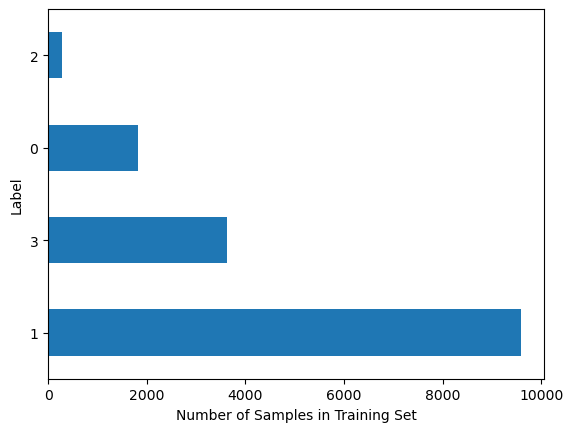

In [8]:
import matplotlib.pyplot as plt
ax = train_data['Sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in Training Set")
ax.set_ylabel("Label")

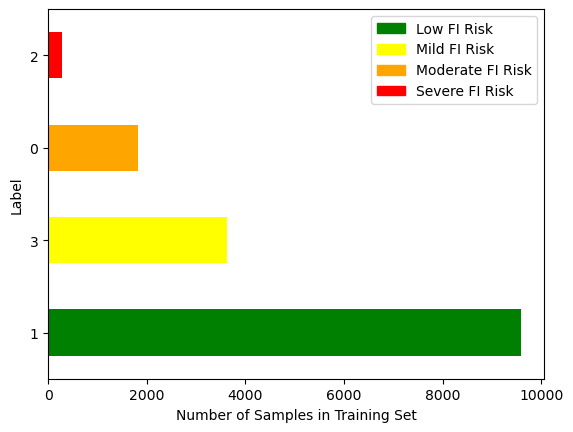

In [9]:
# For HARMONIZED dataset ONLY!
import matplotlib.pyplot as plt

# Define the colors for each sentiment label
colors = ['green', 'yellow', 'orange', 'red']

# Plot the sentiment label counts with corresponding colors
ax = train_data['Sentiment'].value_counts(sort=False).plot(kind='barh', color=colors)

ax.set_xlabel("Number of Samples in Training Set")
ax.set_ylabel("Label")

# Add a legend for the colors
legend_labels = ['Low FI Risk', 'Mild FI Risk', 'Moderate FI Risk', 'Severe FI Risk']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

plt.show()

**Test data**

In [ ]:
import matplotlib.pyplot as plt
ax = test_data['Sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in Testing Set")
ax.set_ylabel("Label")

In [ ]:
import matplotlib.pyplot as plt

# Define the colors for each sentiment label
colors = ['green', 'yellow', 'orange', 'red']

# Plot the sentiment label counts with corresponding colors
ax = train_data['Sentiment'].value_counts(sort=False).plot(kind='barh', color=colors)

ax.set_xlabel("Number of Samples in Training Set")
ax.set_ylabel("Label")

# Add a legend for the colors
legend_labels = ['Low FI Risk', 'Mild FI Risk', 'Moderate FI Risk', 'Severe FI Risk']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

plt.show()

## 2. Feature Extraction<a name="Section2"></a>
Using both TF-IDF and BOW for feature extraction

Try to do it seperately for each modelling

**A. TF-IDF**

In [10]:
# Replace NaN values with an empty string
train_features = np.where(pd.isnull(train_features), '', train_features)

# Create an instance of CountVectorizer
vectorizer = TfidfVectorizer()  # For TF-IDF

# Fit the vectorizer on the training data and transform the training features
train_features_vectorized = vectorizer.fit_transform(train_features)

# Transform the testing features using the trained vectorizer
test_features_vectorized = vectorizer.transform(test_features)

train_features_vectorized.shape, test_features_vectorized.shape

((15285, 21740), (6552, 21740))

In [11]:
# Convert the sparse matrix to a dense matrix and create a DataFrame
train_features_df = pd.DataFrame(train_features_vectorized.toarray(), columns=vectorizer.get_feature_names())
test_features_df = pd.DataFrame(test_features_vectorized.toarray(), columns=vectorizer.get_feature_names())

# Display the feature vectors
print("Training Features:\n", train_features_df)
print("Testing Features:\n", test_features_df)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Training Features:
         aa  aaa  aaaa  aaaaa  aaaaaaa  aaaaaaaaaaaaa  aaaaaaaaaaaaaahhhhh   
0      0.0  0.0   0.0    0.0      0.0            0.0                  0.0  \
1      0.0  0.0   0.0    0.0      0.0            0.0                  0.0   
2      0.0  0.0   0.0    0.0      0.0            0.0                  0.0   
3      0.0  0.0   0.0    0.0      0.0            0.0                  0.0   
4      0.0  0.0   0.0    0.0      0.0            0.0                  0.0   
...    ...  ...   ...    ...      ...            ...                  ...   
15280  0.0  0.0   0.0    0.0      0.0            0.0                  0.0   
15281  0.0  0.0   0.0    0.0      0.0            0.0                  0.0   
15282  0.0  0.0   0.0    0.0      0.0            0.0                  0.0   
15283  0.0  0.0   0.0    0.0      0.0            0.0                  0.0   
15284  0.0  0.0   0.0    0.0      0.0            0.0                  0.0   

       aaaaaaaaaaarrrrrrrrr  aaarghhh  aaengai  ...  zu

In [ ]:
# Save the train_features vectors to CSV files
train_features_df.to_csv('TF-IDF (80-20)- Harmonized train_features.csv', index=False)

In [ ]:
# Save the test_features vectors to CSV files
test_features_df.to_csv('TF-IDF (80-20)- Harmonized test_features.csv', index=False)

**B. BOW**

In [ ]:
# Replace NaN values with an empty string
train_features = np.where(pd.isnull(train_features), '', train_features)

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()  # For BoW

# Fit the vectorizer on the training data and transform the training features
train_features_vectorized = vectorizer.fit_transform(train_features)

# Transform the testing features using the trained vectorizer
test_features_vectorized = vectorizer.transform(test_features)

train_features_vectorized.shape, test_features_vectorized.shape

In [ ]:
# Convert the sparse matrix to a dense matrix and create a DataFrame
train_features_df = pd.DataFrame(train_features_vectorized.toarray(), columns=vectorizer.get_feature_names())
test_features_df = pd.DataFrame(test_features_vectorized.toarray(), columns=vectorizer.get_feature_names())

# Display the feature vectors
print("Training Features:\n", train_features_df)
print("Testing Features:\n", test_features_df)

In [ ]:
# Save the train_features vectors to CSV files
train_features_df.to_csv('BOW (70-30)- VADER train_features.csv', index=False)

In [ ]:
# Save the test_features vectors to CSV files
test_features_df.to_csv('BOW (70-30)- VADER test_features.csv', index=False)

## 3. Model Generation<a name="Section3"></a>

## 3.1 Train model using Naive Bayes<a name="Section6"></a>
Naive bayes is an algorithm that could be used for sentiment analysis. It takes a short time to train and also has a short prediction time.


How to train a Naive Bayes classifier?
- The first part of training a naive bayes classifier is to identify the number of classes that you have.
- We will create a probability for each class.

**Approach**

1. [Multinomial Naive Bayes (MNB)](#Section13)
<br></br>
2. [Bernoulli Naive Bayes (BNB)](#Section14)

Tip:
- If the words can be represented in terms of their occurrences (frequency count) = Use **Multinomial** 
- If we just care about the presence or absence of a word in the document = Use **Bernoulli**

Explanation on Bernoulli VS Multinomial --> https://medium.com/analytics-vidhya/twitter-sentimental-analysis-using-naive-bayes-classifier-process-explanation-f532b96b30b8

## Approach 1: Multinomial Naive Bayes<a name="Section13"></a>

It is used when we have discrete data (e.g. tweets ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text classification we have the count of each word to predict the class or label. 

**Training the Naive Bayes Classifier**

In [12]:
from sklearn.naive_bayes import MultinomialNB

#Create instance of Naive Bayes classifier (either MultinomialNB or BernoulliNB)
mnb_classifier = MultinomialNB()

# Train a Naive Bayes classifier on the training data
start_time = time.time()
mnb_classifier.fit(train_features_vectorized, train_labels)
end_time = time.time()

# Print the runtime of training the classifier
print(f"Training time: {end_time - start_time} seconds")
print(mnb_classifier.get_params())
display(mnb_classifier.feature_log_prob_)

Training time: 0.01347661018371582 seconds
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


array([[ -9.92385861, -10.22150227, -10.22150227, ..., -10.22150227,
        -10.22150227, -10.22150227],
       [ -9.93046248, -10.32139499, -10.37473344, ..., -10.32457925,
        -10.4907963 , -10.47148981],
       [-10.02524548, -10.02524548, -10.02524548, ..., -10.02524548,
        -10.02524548, -10.02524548],
       [-10.21011097,  -9.83728451,  -9.91184149, ..., -10.39136337,
        -10.39136337, -10.39136337]])

**Predict labels of test data**
<br>
Use the print() function to display the test_predictions array

In [13]:
# Create a list of the sentiment labels
sentiment_labels = ['Positive', 'Negative']

# Predict the labels of the test data
start_time = time.time()
test_predictions = mnb_classifier.predict(test_features_vectorized)
end_time = time.time()

# Convert the numeric labels back to sentiment labels
actual_sentiments = encoder.inverse_transform(test_labels)
predicted_sentiments = encoder.inverse_transform(test_predictions)

# Print the predicted labels
display(test_predictions, predicted_sentiments)

array([1, 1, 1, ..., 1, 1, 1])

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

**Print results of predicted labels using DataFrame**

Create a new DataFrame that combines the test data with the predicted labels

In [15]:
# Create a DataFrame with the test data and predicted labels
results_df = pd.DataFrame({'Text': test_data['Cleaned_Tweets'], 'actual_sentiment': actual_sentiments, 
                           'predicted_sentiment': predicted_sentiments})

# Print the DataFrame
display(results_df)

,Text,actual_sentiment,predicted_sentiment
0,hungry cook,Positive,Positive
1,want take responsibility accnt endo getting ne...,Positive,Positive
2,please relax worried know love work please lov...,Positive,Positive
3,annual agenda pansos hurry came path individua...,Mild Negative,Positive
4,okay csb worried growing old ouch inner tita g...,Weakly Negative,Positive
...,...,...,...
6547,according estimate lost wasted could feed bill...,Mild Negative,Positive
6548,worried thai aluminum work leave building resp...,Positive,Positive
6549,cheap sunny good food gave creature comfort ci...,Positive,Positive
6550,sodiq rishema hour stomach hungry,Positive,Positive


In [ ]:
# Create a dictionary to map sentiment labels to risk labels
sentiment_labels = ['Positive', 'Weakly Negative', 'Mild Negative', 'Strongly Negative']
risk_labels = ['Low Risk', 'Mild Risk', 'Moderate Risk', 'Severe Risk']
label_mapping = {sentiment_labels[i]: risk_labels[i] for i in range(len(sentiment_labels))}

# Apply reassignment to the actual and predicted sentiment labels
results_df['actual_risk'] = results_df['actual_sentiment'].map(label_mapping)
results_df['predicted_risk'] = results_df['predicted_sentiment'].map(label_mapping)

# Print the dataframe
display(results_df)

In [ ]:
#Save results into CSV file
results_df.to_csv('MNB_BOW (80-20)- Predict Label Modelling Results (RS=0)[Harmonized].csv', index=False)

## Approach 2: Bernoulli Naive Bayes<a name="Section14"></a>

It assumes that all our features are binary such that they take only two values. 

Means 0s can represent “word does not occur in the document” and 1s as “word occurs in the document”

**Training the Classifier**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

#Create instance of Naive Bayes classifier
bnb_classifier = BernoulliNB()

# Train a Naive Bayes classifier on the training data
start_time = time.time()
bnb_classifier.fit(train_features_vectorized, train_labels)
end_time = time.time()

# Print the runtime of training the classifier
print(f"Training time: {end_time - start_time} seconds")

In [ ]:
print(bnb_classifier.get_params())

In [ ]:
display(bnb_classifier.feature_log_prob_)

**Predict labels of test data**
<br>
Use the print() function to display the test_predictions array

In [ ]:
# Predict the labels of the test data
start_time = time.time()
test_predictions = bnb_classifier.predict(test_features_vectorized)
end_time = time.time()

# Print the runtime of predicting the labels
print(f"Prediction time: {end_time - start_time} seconds")

# Print the predicted labels
print(test_predictions)

**Print results of predicted labels using DataFrame**

Create a new DataFrame that combines the test data with the predicted labels

In [ ]:
# Create a DataFrame with the test data and predicted labels
results_df = pd.DataFrame({'Text': test_data['Cleaned_Tweets'], 'actual_sentiment': test_labels, 
                           'predicted_sentiment': test_predictions})

# Print the DataFrame
display(results_df)

In [ ]:
#Save results into CSV file
results_df.to_csv('BNB_TF-IDF (70-20)- Predict Label Modelling Results [Harmonized].csv', index=False)

## Pickling the Model<a name="Section15"></a>

If you still want to see the full output of the classifier object, you can try using the pickle module to save the classifier object to a file and then load it back into memory:

In [ ]:
import pickle

# Save the classifier object to a file
with open('BNB_classifier TF-IDF (Harmonized-70-30).pkl', 'wb') as file:
    pickle.dump(bnb_classifier, file)

# Print the classifier object
print(bnb_classifier)

In [ ]:
# Load the classifier object from the file
with open('nb_classifier.pkl', 'rb') as file:
    nb_classifier = pickle.load(file)

In [ ]:
#In case you wanna use the loaded classifier model from file
# Use this code to perform prediction
predictions = loaded_model.predict(new_data)

## 4. Model Evaluation<a name="Section4"></a>
<br></br>
**A. Evaluation Metrics:**

1. Accuracy
<br></br>
2. Precision
<br></br>
3. F1 Score
<br> Due to an imbalance classes, F1 score was metric was used </br>
4. Recall

**B. K-Fold Cross Validation**

Using k-fold (k = 10)
<br></br>
Part of code retrieved from here:
https://github.com/ThinamXx/Twitter..Sentiment..Analysis/blob/master/Twitter%20Sentiment%20Analysis.ipynb

<h2> A. Evaluation Metrics </h2>

In [ ]:
# Using the fitted model to make predictions on testing data
# Predict the labels of the test data
test_predictions = bnb_classifier.predict(test_features_vectorized)

# Print the predicted labels
print(test_predictions)

**Checking the accuracy in Testing Data**

In [ ]:
#Evaluate the performance of Naive Bayes classifier

print(f"Model evaluation on Testing Data:\n {confusion_matrix(test_labels, test_predictions)}")
print(f"Classification Report:\n {classification_report(test_labels, test_predictions)}")
print(f"Testing accuracy:\n {accuracy_score(test_labels, test_predictions)}")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)

# Calculate the precision of the classifier
precision = precision_score(test_labels, test_predictions, average='weighted')

# Calculate the recall of the classifier
recall = recall_score(test_labels, test_predictions, average='weighted')

# Calculate the F1 score of the classifier
f1 = f1_score(test_labels, test_predictions, average='weighted')

# Calculate the confusion matrix of the classifier
confusion_mat = confusion_matrix(test_labels, test_predictions)

# Define the labels for the confusion matrix
labels = ['True Negative (TN)', 'False Positive (FP)', 'False Negative (FN)', 'True Positive (TP)']

# Create a new confusion matrix with the labels
confusion_mat_labeled = np.empty((2,2), dtype=int)
confusion_mat_labeled[0,0] = confusion_mat[0,0] # True Negative
confusion_mat_labeled[0,1] = confusion_mat[0,1] # False Positive
confusion_mat_labeled[1,0] = confusion_mat[1,0] # False Negative
confusion_mat_labeled[1,1] = confusion_mat[1,1] # True Positive

# Create a DataFrame with the confusion matrix and labels
confusion_df = pd.DataFrame(confusion_mat_labeled, index=labels[:2], columns=labels[2:])

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy * 100, "%")
print("Precision:", precision * 100, "%")
print("Recall:", recall * 100, "%")
print("F1 Score:", f1 * 100, "%")
display("Confusion Matrix:", confusion_df)

In [ ]:
# Create a dictionary to store the evaluation metrics (Initial)
evaluation_results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
}

# Create a DataFrame from the evaluation results
df_evaluation = pd.DataFrame(evaluation_results)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_mat, columns=['False Negative', 'False Positive'], index=['True Negative', 'True Positive'])

# Concatenate the evaluation DataFrame and confusion DataFrame
results_df = pd.concat([df_evaluation, confusion_df], axis=0)

# Save the DataFrame to a CSV file
results_df.to_csv('[Harmonized] MNB TF-IDF (80-20) Initial Model_Evaluation.csv', index=False)

In [ ]:
#For Harmonized Sentiments Dataset
# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_mat, columns=sentiment_labels, index=sentiment_labels)

# Save the DataFrame to a CSV file
results_df.to_csv('[Harmonized] MNB TF-IDF (70-30) Initial Model_Evaluation.csv', index=False)

**Error Analysis**

In this part, we will see some tweets that your model missclassified. Why do we think the misclassifications happened? Were there any assumptions made by the naive bayes model?

Source:
<br>
https://github.com/cdaman123/Sentiment-Analysis-using-Naive-Bayes/blob/main/Sentiment_Analysis_NB.ipynb

<h3>ROC Curve</h3>

In [ ]:
# Predict the probabilities of the test data
test_probabilities = mnb_classifier.predict_proba(test_features_vectorized)[:, 1]

# Print the predicted labels
print(test_probabilities)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, test_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**HARMONIZED SENTIMENT TWEETS DATASET**

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the test labels
binarized_labels = label_binarize(test_labels, classes=[0, 1, 2, 3])

# Compute the probability predictions for each class
test_probabilities = mnb_classifier.predict_proba(test_features)

# Compute the ROC curve and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(sentiment_labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], test_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr_micro, tpr_micro, _ = roc_curve(binarized_labels.ravel(), test_probabilities.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves
plt.figure(figsize=(10, 6))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc_micro), linestyle=':', linewidth=4)

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(sentiment_labels[i], roc_auc[i]), linewidth=2)

# Add plot labels and legends
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Show the plot
plt.show()

<h2> B. K-fold Cross Validation </h2>

Use the cross_val_score() function from sklearn.model_selection to evaluate the performance of the classifier using 5-fold cross-validation. 
<br></br>
The cross_val_score() function takes the classifier, the feature vectors, the labels, and the number of folds as input, and returns an array of scores for each fold

**Output: Cross-validation scores for each fold + Average cross-validation score**

Note: cv = k (k-fold)

In [ ]:
%%time
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation and obtain the scores for each fold
scores = cross_val_score(bnb_classifier, train_features_vectorized, train_labels, cv=10)

# Print the accuracy for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Mean accuracy: {mean_accuracy}")
print(f"Standard deviation: {std_deviation}")

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the performance of Naive Bayes classifier using cross-validation
scores = cross_val_score(bnb_classifier, train_features_vectorized, train_labels, cv=10)

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

**How to find the BEST hyperparameters for Naive Bayes classifier**

The GridSearchCV() function takes the classifier, the hyperparameters, and the number of folds as input, and returns the best hyperparameters and the corresponding score.

In [ ]:
from sklearn.model_selection import GridSearchCV #Perform grid search over hyperparameters
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Create instance of Naive Bayes classifier
#mnb_classifier = MultinomialNB()
bnb_classifier = BernoulliNB()

# Define the hyperparameters to search over
hyperparameters = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Use grid search to find the best hyperparameters for the classifier
grid_search = GridSearchCV(bnb_classifier, hyperparameters, cv=10)
grid_search.fit(train_features_vectorized, train_labels)

# Print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

We then print the best hyperparameters and the corresponding score using the print() function. The resulting output will show the best hyperparameters found by the grid search and the corresponding score.

After finding the best hyperparameters, you can process to train and evaluate Naive Bayes classifier

In [ ]:
# Replace NaN values with an empty string
train_features = np.where(pd.isnull(train_features), '', train_features)

# Create an instance of CountVectorizer
vectorizer = TfidfVectorizer()  # For TF-IDF
#vectorizer = CountVectorizer()  # For BoW

# Fit the vectorizer on the training data and transform the training features
train_features_vectorized = vectorizer.fit_transform(train_features)

# Transform the testing features using the trained vectorizer
test_features_vectorized = vectorizer.transform(test_features)

train_features_vectorized.shape, test_features_vectorized.shape

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Split the data into training and testing sets
# Remember to modify test size each time you're trying to run a new model!!
train_features, test_features, train_labels, test_labels = train_test_split(features, encoded_labels, 
                                                                            test_size=0.3, random_state=42)

# Replace NaN values with an empty string
train_features = np.where(pd.isnull(train_features), '', train_features)

# Create an instance of CountVectorizer
vectorizer = TfidfVectorizer()  # For TF-IDF
#vectorizer = CountVectorizer()  # For BoW

# Fit the vectorizer on the training data and transform the training features
train_features_vectorized = vectorizer.fit_transform(train_features)

# Transform the testing features using the trained vectorizer
test_features_vectorized = vectorizer.transform(test_features)

# Create instance of Naive Bayes classifier with best hyperparameters
#mnb_classifier = MultinomialNB(alpha=1.0)
bnb_classifier = BernoulliNB(alpha=2.0)

# Train a Naive Bayes classifier on the training data
bnb_classifier.fit(train_features_vectorized, train_labels)

# Predict the labels of the test data
test_predictions = bnb_classifier.predict(test_features_vectorized)

# Evaluate the performance of the classifier on the test data
confusion = confusion_matrix(test_labels, test_predictions)
report = classification_report(test_labels, test_predictions)
accuracy = accuracy_score(test_labels, test_predictions)

# Print the confusion matrix, classification report, and accuracy score
print(f"Confusion matrix:\n{confusion}")
print(f"Classification report:\n{report}")
print(f"Accuracy score: {accuracy}")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate the accuracy of the classifier
accuracy = accuracy_score(test_labels, test_predictions)

# Calculate the precision of the classifier
precision = precision_score(test_labels, test_predictions, average='weighted')

# Calculate the recall of the classifier
recall = recall_score(test_labels, test_predictions, average='weighted')

# Calculate the F1 score of the classifier
f1 = f1_score(test_labels, test_predictions, average='weighted')

# Calculate the confusion matrix of the classifier
confusion_mat = confusion_matrix(test_labels, test_predictions)

# Define the labels for the confusion matrix
labels = ['True Negative (TN)', 'False Positive (FP)', 'False Negative (FN)', 'True Positive (TP)']

# Create a new confusion matrix with the labels
confusion_mat_labeled = np.empty((2,2), dtype=int)
confusion_mat_labeled[0,0] = confusion_mat[0,0] # True Negative
confusion_mat_labeled[0,1] = confusion_mat[0,1] # False Positive
confusion_mat_labeled[1,0] = confusion_mat[1,0] # False Negative
confusion_mat_labeled[1,1] = confusion_mat[1,1] # True Positive

# Create a DataFrame with the confusion matrix and labels
confusion_df = pd.DataFrame(confusion_mat_labeled, index=labels[:2], columns=labels[2:])

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy * 100, "%")
print("Precision:", precision * 100, "%")
print("Recall:", recall * 100, "%")
print("F1 Score:", f1 * 100, "%")
display("Confusion Matrix:", confusion_df)

In [ ]:
# Create a dictionary to store the evaluation metrics (After tuning)
evaluation_results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
}

# Create a DataFrame from the evaluation results
df_evaluation = pd.DataFrame(evaluation_results)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_mat, columns=['False Negative', 'False Positive'], index=['True Negative', 'True Positive'])

# Concatenate the evaluation DataFrame and confusion DataFrame
results_df = pd.concat([df_evaluation, confusion_df], axis=0)

# Save the DataFrame to a CSV file
results_df.to_csv('[Harmonized] MNB BOW (80-20) Post Hypertuning Model_Evaluation.csv', index=False)

In [ ]:
#For Harmonized Sentiments Dataset
# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_mat, columns=sentiment_labels, index=sentiment_labels)

# Save the DataFrame to a CSV file
results_df.to_csv('[Harmonized] MNB TF-IDF (80-20) Post Hypertuning Model_Evaluation.csv', index=False)

## 5. Predict Sentiment of New text Data<a name="Section5"></a>
Back to [Top Page](#TOC)

Using the trained model classifier, we can predict the sentiment of new text data
<br>

Positive [1] - Food Secured

Negative [0] - Food Insecure

A) [VADER/TextBlob Dataset](#Section14)
<br>
B) [Harmonized Dataset](#Section15)

### A) VADER/TextBlob Dataset<a name="Section14"></a>

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()  # For TF-IDF

# Create a CountVectorizer object
#vectorizer = CountVectorizer() # For BOW

# Vectorize the training data
features_vectorized = vectorizer.fit_transform(train_features)

# Create instance of Naive Bayes classifier with best hyperparameters
#mnb_classifier = MultinomialNB(alpha=1.0)
bnb_classifier = BernoulliNB(alpha=2.0)

# Train a Naive Bayes classifier on the training data
bnb_classifier.fit(train_features_vectorized, train_labels)

# Predict the sentiment of new text data
new_data = ["I'm so angry about the high food prices! It's making it so hard for me to feed my family.",
            "I'm so grateful for the food banks and other organizations that are helping to feed people who are struggling. They're making a real difference.",
            "I'm so worried about the future of food security. Climate change is making it harder to grow food, and more people are going hungry.",
            "I'm so inspired by the work of food banks and other organizations that are fighting hunger. They're making a real difference in people's lives.",
            "I'm hopeful that we can create a world where everyone has access to the food they need to live a healthy and productive life",
            "I'm working part-time and I'm not sure if I'll be able to keep my job.",
            "I'm not sure if I'll be able to afford to pay my rent this month."
           ]

new_data_vectorized = vectorizer.transform(new_data)
new_data_predictions = bnb_classifier.predict(new_data_vectorized)
new_data_sentiment_scores = bnb_classifier.predict_proba(new_data_vectorized)[:, 1]  # Positive sentiment score

# Print the predicted sentiment + sentiment scoures for the new data
for i in range(len(new_data)):
    print(f"Text: {new_data[i]}")
    sentiment_label = "Food Secured" if new_data_predictions[i] == 1 else "Food Insecure"
    print(f"Predicted sentiment: {sentiment_label}")
    print(f"Sentiment score: {new_data_sentiment_scores[i]}")
    print()

**Save the new data results into CSV file**

In [ ]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Text': new_data,
    'Predicted Sentiment': new_data_predictions,
    'Sentiment Score': new_data_sentiment_scores
})

# Save the DataFrame to a CSV file
results_df.to_csv('[SAMPLE] [BNB] TF-IDF Harmonized (70-30) new_data_results.csv', index=False)

### B) Harmonized Dataset<a name="Section15"></a>

**Predict sentiment & FI Risk Category of New Text Data**

### Immediate Solution for Predicting FI Risk <a name="Section16"></a>

In [ ]:
# Define the risk category mapping
risk_category_mapping = {
    0: "\033[1;32mLow Risk\033[0m",  # Green
    1: "\033[1;33mMild Risk\033[0m", # Yellow
    2: "\033[1;31mModerate Risk\033[0m", # Orange
    3: "\033[1;31mSevere Risk\033[0m"  # Red
}

# Create a CountVectorizer object
vectorizer = TfidfVectorizer() # For TF-IDF
#vectorizer = CountVectorizer() # For BOW

# Vectorize the training data
features_vectorized = vectorizer.fit_transform(train_features)

#Create an instance for hypertuned Naive Baise Classifier
#mnb_classifier = MultinomialNB(alpha=1.0)
bnb_classifier = BernoulliNB(alpha=2.0)

# Train a Multinomial Logistic Regression classifier on the training data
bnb_classifier.fit(train_features_vectorized, train_labels)

# Function to predict sentiment, sentiment score, and FI risk category of new text data
def predict_sentiment_and_fi_risk(text):
    # Vectorize the new text data
    new_text_vectorized = vectorizer.transform([text])

    # Predict the sentiment using the trained model
    sentiment = bnb_classifier.predict(new_text_vectorized)[0]

    # Predict the sentiment score using the trained model
    sentiment_score = np.max(bnb_classifier.predict_proba(new_text_vectorized))

    # Assign the FI risk category based on sentiment and sentiment score
    if sentiment == 1:  # Positive sentiment (Food Secured)
        fi_sentiment = "Positive"
        fi_risk = risk_category_mapping[0]  # Low Risk
    else:  # Negative sentiment
        sentiment_score *= -1  # Multiply the sentiment score by -1 for Negative sentiment (Food Insecure)
        
        if (sentiment_score > -1.0) and (sentiment_score <= -0.6):
            fi_sentiment = "Negative (Strongly Negative)"
            fi_risk = risk_category_mapping[3]  # Severe Risk
        elif (sentiment_score > -0.6) and (sentiment_score <= -0.3):
            fi_sentiment = "Negative (Mild Negative)"
            fi_risk = risk_category_mapping[2]  # Moderate Risk
        else:
            fi_sentiment = "Negative (Weakly Negative)"
            fi_risk = risk_category_mapping[1]  # Mild Risk

    return fi_sentiment, sentiment_score, fi_risk


# Predict the sentiment, sentiment score, and FI risk for the new text data
new_data = [
    "I'm so angry about the high food prices! It's making it so hard for me to feed my family.",
    "I'm so grateful for the food banks and other organizations that are helping to feed people who are struggling. They're making a real difference.",
    "I'm so worried about the future of food security. Climate change is making it harder to grow food, and more people are going hungry.",
    "I'm so inspired by the work of food banks and other organizations that are fighting hunger. They're making a real difference in people's lives.",
    "I'm hopeful that we can create a world where everyone has access to the food they need to live a healthy and productive life",
    "I'm working part-time and I'm not sure if I'll be able to keep my job.",
    "I'm not sure if I'll be able to afford to pay my rent this month."
]

final_results = []
for text in new_data:
    fi_sentiment, sentiment_score, fi_risk = predict_sentiment_and_fi_risk(text)
    print("Text:", text)
    print("Predicted sentiment:", fi_sentiment)
    print("Sentiment score:", sentiment_score)
    print("FI Risk:", fi_risk)
    print()
    
    # Store the results in a dictionary
    final_result = {
        "Text": text,
        "Predicted Sentiment": fi_sentiment,
        "Sentiment Score": sentiment_score,
        "FI Risk": fi_risk
    }
    final_results.append(final_result)

In [ ]:
# Create a DataFrame for the results
final_results_df = pd.DataFrame(final_results)

# Print the DataFrame
print(final_results_df)

In [ ]:
# Save the DataFrame to a CSV file
final_results_df.to_csv('[SAMPLE] [BNB] TF-IDF Harmonized (70-30) final new_data_results.csv', index=False)

### ALTERNATE 4

In [ ]:
    if sentiment_score > 0 and sentiment_score <= 1.0:
        sentiment_label = "Positive - Food Secured"
        fi_risk_category = "\033[1;32mLow\033[0m"  # Green
    elif sentiment_score > -0.3 and sentiment_score <= 0:
        sentiment_label = "Negative - Food Insecure"
        fi_risk_category = "\033[1;33mMild\033[0m" # Yellow
    elif sentiment_score > -0.6 and sentiment_score <= -0.3:
        sentiment_label = "Negative - Food Insecure"
        fi_risk_category = "\033[1;31mModerate\033[0m" # Orange
    elif sentiment_score > -1.0 and sentiment_score <= -0.6:
        sentiment_label = "Negative - Food Insecure"
        fi_risk_category = "\033[1;31mSevere\033[0m"  # Red
    else:
        sentiment_label = "Invalid Sentiment & No FI Risk"
        fi_risk_category = "Invalid FI Risk"

In [ ]:
# Define the risk category mapping
risk_category_mapping = {
    0: "\033[1;32mLow Risk\033[0m",  # Green
    1: "\033[1;33mMild Risk\033[0m", # Yellow
    2: "\033[1;31mModerate Risk\033[0m", # Orange
    3: "\033[1;31mSevere Risk\033[0m"  # Red
}

# Function to predict sentiment, sentiment score, and FI risk category of new text data
def predict_sentiment_and_fi_risk(text):
    # Vectorize the new text data
    new_text_vectorized = vectorizer.transform([text])

    # Predict the sentiment using the trained model
    sentiment = mnb_classifier.predict(new_text_vectorized)[0]

    # Predict the sentiment score using the trained model
    sentiment_score = np.max(mnb_classifier.predict_proba(new_text_vectorized))

    # Assign the FI risk category based on sentiment and sentiment score
    if sentiment == 1:  # Positive sentiment (Food Secured)
        fi_sentiment = "Positive"
        fi_risk = risk_category_mapping[0]  # Low Risk
    else:  # Negative sentiment
        sentiment_score *= -1  # Multiply the sentiment score by -1 for Negative sentiment (Food Insecure)
        
        if (sentiment_score > -1.0) and (sentiment_score <= -0.6):
            fi_sentiment = "Negative (Strongly Negative)"
            fi_risk = risk_category_mapping[3]  # Severe Risk
        elif (sentiment_score > -0.6) and (sentiment_score <= -0.3):
            fi_sentiment = "Negative (Mild Negative)"
            fi_risk = risk_category_mapping[2]  # Moderate Risk
        else:
            fi_sentiment = "Negative (Weakly Negative)"
            fi_risk = risk_category_mapping[1]  # Mild Risk

    return fi_sentiment, sentiment_score, fi_risk


# Predict the sentiment, sentiment score, and FI risk for the new text data
new_data = [
    "I'm so angry about the high food prices! It's making it so hard for me to feed my family.",
    "I'm so grateful for the food banks and other organizations that are helping to feed people who are struggling. They're making a real difference.",
    "I'm so worried about the future of food security. Climate change is making it harder to grow food, and more people are going hungry.",
    "I'm so inspired by the work of food banks and other organizations that are fighting hunger. They're making a real difference in people's lives.",
    "I'm hopeful that we can create a world where everyone has access to the food they need to live a healthy and productive life",
    "I'm working part-time and I'm not sure if I'll be able to keep my job.",
    "I'm not sure if I'll be able to afford to pay my rent this month."
]

for text in new_data:
    fi_sentiment, sentiment_score, fi_risk = predict_sentiment_and_fi_risk(text)
    print("Text:", text)
    print("Predicted sentiment:", fi_sentiment)
    print("Sentiment score:", sentiment_score)
    print("FI Risk:", fi_risk)
    print()

In [ ]:
# Save the DataFrame to a CSV file
results_df.to_csv('[SAMPLE] [MNB] TF-IDF Harmonized (80-20) final_data_results.csv', index=False)

### Alternate 5

In [ ]:
# BACKUP CODE - Use when NEEDED ONLY!! 

# Define a function to assign the FI risk category based on the sentiment score
def assign_fi_risk(sentiment, score):
    if sentiment == 0:
        # Assigns Moderate FI risk for negative sentiment score range
        if -0.59 <= score < -0.4:
            return "\033[1;31mModerate\033[0m"  # Light Orange
        # Assign Severe FI risk for negative sentiment score below -0.6
        elif score > -0.6:
            return "\033[1;31mSevere\033[0m"  # Red
        else:
            # Assigns Mild risk for negative sentiment score range
            return "\033[1;33mMild\033[0m"  # Yellow 
    elif sentiment == 1:
        # Assigns Low FI risk for positive sentiment score range
        if 0.1 <= score <= 1:
            return "\033[1;32mLow\033[0m"  # Green
        else:
            # Invalid sentiment score range
            return "Invalid FI Risk" 
    else:
        return "Invalid FI Risk"  # Invalid sentiment value

# Create an empty list to store the results
results = []

# Print the predicted sentiment + sentiment scores for the new data
for i in range(len(new_data)):
    print(f"Text: {new_data[i]}")
    sentiment_label = "Food Secured" if new_data_predictions[i] == 1 else "Food Insecure"
    print(f"Predicted sentiment: {sentiment_label}")
    sentiment_score = new_data_sentiment_scores[i]
    fi_risk = assign_fi_risk(new_data_predictions[i], sentiment_score)
    print(f"Sentiment score: {sentiment_score}")
    print(f"FI Risk: {fi_risk}")
    print()
    
    # Append the results to the list
    results.append([new_data[i], sentiment_label, sentiment_score, fi_risk])

In [ ]:
# Create a pandas dataframe from the results list
results_df = pd.DataFrame(results, columns=["Text", "Sentiment Label", "Sentiment Score", "FI Risk"])

display(results_df)

In [ ]:
# Save the DataFrame to a CSV file
results_df.to_csv('[SAMPLE] [BNB] TF-IDF VADER (80-20) final new_data_results.csv', index=False)

## 5. Visualization<a name="Section5"></a>

**Type of Visualizations:**
1. Heatmap

**Heatmap**

In [ ]:
import seaborn as sns

# Plotting the heatmap of confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
sns.heatmap(cm, annot=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Create a new confusion matrix with the labels
confusion_mat_labeled = np.empty((2,2), dtype=int)
confusion_mat_labeled[0,0] = confusion_mat[0,0] # True Negative
confusion_mat_labeled[0,1] = confusion_mat[0,1] # False Positive
confusion_mat_labeled[1,0] = confusion_mat[1,0] # False Negative
confusion_mat_labeled[1,1] = confusion_mat[1,1] # True Positive

# Create a DataFrame with the confusion matrix and labels
confusion_df = pd.DataFrame(confusion_mat_labeled, index=labels[:2], columns=labels[2:])

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_df, annot=True)

# Show the plot
plt.show()

**For Harmonized Sentiment Tweets Dataset**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Perform predictions on the test data
test_predictions = bnb_classifier.predict(test_features_vectorized)

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, test_predictions)

# Create a list of sentiment labels
sentiment_labels = ["0", "1", "2", "3"]

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=sentiment_labels, yticklabels=sentiment_labels)

# Set the axis labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Show the plot
plt.show()